In [2]:
# It implements the K-Nearest Neighbors (K-NN) algorithm, which is a supervised classification algorithm.
# K-NN works by finding the 'k' nearest data points in the training dataset to a given test point, based on some distance metric (e.g., Euclidean distance).
# The class of the test point is determined by a majority vote of the nearest neighbors

In [3]:

# Importing necessary libraries
import numpy as np
# numpy is used for handling arrays and numerical operations.
import matplotlib.pyplot as plt
import pandas as pd
# pandas is used for data manipulation and analysis, such as reading datasets and working with DataFrames.

In [4]:
# Loading the dataset
dataset = pd.read_csv(r"C:\Users\user\Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values
# age,salary(independent)
y = dataset.iloc[:, -1].values
# purchased(dependent)

In [5]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [7]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [8]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [9]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [10]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# fit_transform on X_train: Compute and apply scaling using training data.
X_test = sc.transform(X_test)
# transform on X_test: Apply the same scaling (computed from X_train) to ensure consistent preprocessing for both training and test data.

In [11]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [12]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [13]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

In [14]:
print(y_test)


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [15]:
# Training the K-NN model
# Training the K-NN model on the training set
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# KNeighborsClassifier() initializes a K-NN classifier with specific parameters:
# n_neighbors=5: This sets the number of neighbors (k) used in the classification.
# For each test sample, the algorithm identifies the 5 nearest points in the training dataset and uses their labels to predict the class.

# metric='minkowski': Minkowski distance is used as the distance metric

# p=2: This specifies the type of Minkowski distance to use

classifier.fit(X_train, y_train)



# In the case of KNeighborsClassifier:
# There’s no need to transform the dataset because K-NN doesn’t modify or preprocess the data on its own.
# K-NN only stores the raw training data and uses it as-is for distance calculations at prediction time.
# Hence, fit_transform() is not applicable or necessary for classifiers like K-NN.

KNeighborsClassifier()

In [16]:
# Predicting a new result
new_prediction = classifier.predict(sc.transform([[30, 87000]]))
print("Prediction for [30, 87000]:", new_prediction)

Prediction for [30, 87000]: [0]


In [17]:
# Predicting the test set results

y_pred = classifier.predict(X_test)
print("Predictions and Actual Results:\n", 
      np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

Predictions and Actual Results:
 [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [18]:
# Confusion Matrix
# The confusion matrix is a summary of prediction results on a classification problem.

# The confusion matrix for binary classification looks like this:
# __________|____Predicted = 0______|____Predicted = 1____|
# Actual = 0|	True Negatives (TN)	| False Positives (FP)|
# Actual = 1|	False Negatives (FN)| True Positives (TP) |
# Each term has the following meaning:

# True Positive (TP): The model correctly predicts class 1 (positive) when the actual value is 1.
# True Negative (TN): The model correctly predicts class 0 (negative) when the actual value is 0.
# False Positive (FP): The model predicts class 1 when the actual value is 0. This is also called a Type I Error.
# False Negative (FN): The model predicts class 0 when the actual value is 1. This is also called a Type II Error.



# The accuracy score measures the overall correctness of the model and is defined as:

# Accuracy= (TP+TN)/(TP+TN+FP+FN) 

In [19]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[64  4]
 [ 3 29]]
Accuracy: 0.93


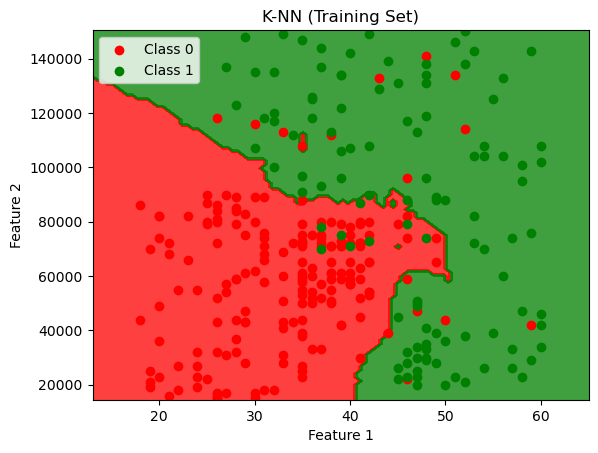

In [23]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
# X_train is inverse-transformed to bring it back to its original scale (age and salary before standard scaling) for easier interpretation in the plot.
# y_train contains the true labels for the training set (class 0 or 1).

# Step 1: Define an optimized grid
X1, X2 = np.meshgrid(
    np.linspace(X_set[:, 0].min() - 5, X_set[:, 0].max() + 5, 100),  # age(x axis)
    np.linspace(X_set[:, 1].min() - 500, X_set[:, 1].max() + 500, 100)   # Salary(y axis)
)


# X_set[:, 0]: Selects the first feature (or x-coordinate) of the dataset X_set. X1 (age) and X2 (salary)
# .min() and .max(): Find the minimum and maximum values of the x-coordinates.
# -5 and +5: Extend the range by 5 units on both sides to ensure the grid covers a slightly larger area than the data range.
# 100: Specifies that the range should be divided into 100 equally spaced values. This creates the x-axis values for the grid.
# python
# Same logic applies, but for the second feature (or y-coordinate). The range is extended by 500 units instead of 5. This is likely because the second feature has a much larger range compared to the first feature.




# Step 2: Predict in batches to handle memory efficiently
grid_points = np.array([X1.ravel(), X2.ravel()]).T


# X1 and X2 are 2D arrays created by np.meshgrid ,ravel() Converts a multidimensional array into a 1D array 


# A 2D array grid_points where each row is [age, salary].
# For example, if the age range is [20, 60] and salary range is [30,000, 80,000], some grid points might look like:
# [20.0, 30000.0]
# [20.0, 30505.1]
# [20.0, 31010.2]


# np.array([X1.ravel(), X2.ravel()]) creates a 2D array where:
# [[20, 21, 22, 20, 21, 22, 20, 21, 22],  age
#  [300000, 300000, 300000, 310000, 310000, 310000, 320000, 320000, 320000]]  salry
# .T (transpose) swaps rows and columns, resulting in:
# [[20, 300000],  
#  [21, 300000],  
#  [22, 300000], 

batch_size = 10000  # Adjust batch size to fit memory constraints
# Batching: If the grid contains too many points (e.g., 10,000 for a 100x100 grid), predictions are computed in smaller chunks to avoid memory issues.

predictions = []

for i in range(0, len(grid_points), batch_size):
    # Divides the total number of grid points into chunks of size batch_size.
    batch = grid_points[i:i + batch_size]
    # Extracts a slice of grid_points (e.g., points [i] to [i + batch_size - 1]) for processing in the current iteration.
    batch_scaled = sc.transform(batch)  # Apply the same scaling used on the training data
    predictions.append(classifier.predict(batch_scaled))
    # Uses the trained classifier to predict the labels (e.g., class 0 or 1) for the scaled batch of grid points.
    # predictions.append(...):
    # Appends the predictions for the current batch to the predictions list.Since predictions are computed in batches, each batch’s results are appended to the list to accumulate the predictions for the entire grid.

# Combine predictions and reshape to grid shape
predictions = np.concatenate(predictions).reshape(X1.shape)
# Combines all the individual prediction arrays (arrays) from the list into a single 1D NumPy array.
# reshape(X1.shape):
# The predictions are initially in a flat, 1D array form after concatenation.
# Reshaping them to match X1.shape allows you to visualize predictions over the 2D grid (e.g., for decision boundary plots).

# Step 3: Plot the decision boundary
plt.contourf(X1, X2, predictions, alpha=0.75, cmap=ListedColormap(('red', 'green')))


# plt.contourf()
# Purpose: Plots a filled contour plot, where different regions are shaded based on the value of predictions.
# X1, X2: The grid coordinates (age and salary in this context) generated by np.meshgrid.
# predictions: The 2D array of predicted class labels for each grid point, reshaped to match X1 and X2.
# Effect: Divides the feature space into regions based on the classifier's predictions and fills each region with a color.
# alpha=0.75
# Controls the transparency of the filled regions.
# Value Range:
# 0 (completely transparent) to 1 (completely opaque).
# Effect: A value of 0.75 ensures the plot is semi-transparent, allowing other elements (e.g., data points, axes) to remain visible.
# cmap=ListedColormap(('red', 'green'))
# Purpose: Specifies the colors for the contour regions.
# ListedColormap:
# Creates a colormap with a fixed list of colors, here:
# 'red': For one class (e.g., 0).
# 'green': For another class (e.g., 1).



# Step 4: Scatter plot the actual data points
for i, j in enumerate(np.unique(y_set)):  # np.unique(y_set):Extracts the unique class labels from y_set (e.g., [0, 1] for a binary classification problem).
# index (i, prediction yes(1) or no (0)) and the class label (j, 0 and 1).
    plt.scatter(    #Plots the actual data points for each class as a scatter plot.
        X_set[y_set == j, 0],  #X_set[y_set == j, 0]:Selects the first feature (e.g., age) for all data points belonging to class j.
        X_set[y_set == j, 1], #X_set[y_set == j, 1]:Selects the second feature (e.g., salary) for the same class.
        color=ListedColormap(('red', 'green'))(i),  # i determines the color:i = 0 → Red (class 0).i = 1 → Green (class 1).
        label=f'Class {j}'  # Adds a legend label for each class (e.g., "Class 0" and "Class 1").
    )

# Step 5: Add labels, title, and legend
plt.title('K-NN (Training Set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [21]:
# Red and Green Regions:
# The background is divided into two regions:
# Red: Predicted as class 0 (e.g., did not purchase the product).
# Green: Predicted as class 1 (e.g., purchased the product).
# The boundary between red and green is the decision boundary, determined by the logistic regression classifier.
# Data Points:
# Red dots: Actual training points labeled as class 0.
# Green dots: Actual training points labeled as class 1.
# Alignment:
# The points align reasonably well with the predicted regions, indicating that the model is learning to separate the classes effectively.

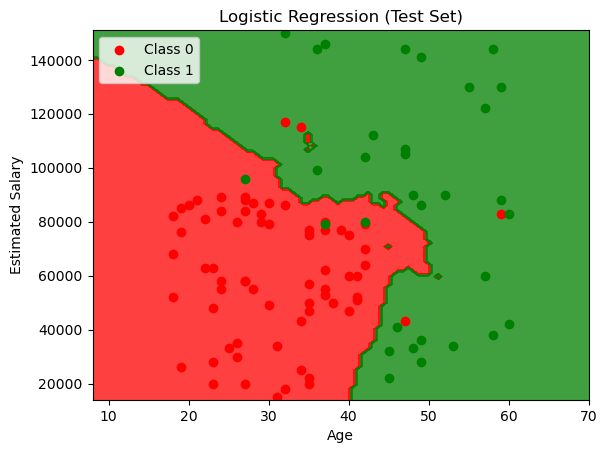

In [22]:
# Ensure y_set is 1D
X_set, y_set = sc.inverse_transform(X_test), y_test.ravel()

# Define a grid with optimized step size to avoid memory issues
X1, X2 = np.meshgrid(
    np.linspace(X_set[:, 0].min() - 10, X_set[:, 0].max() + 10, 100),  # Adjust step size for grid
    np.linspace(X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000, 100)
)

# Predict in batches for memory efficiency
grid_points = np.array([X1.ravel(), X2.ravel()]).T
batch_size = 10000  # Adjust batch size to avoid memory errors
predictions = []

for i in range(0, len(grid_points), batch_size):
    batch = grid_points[i:i + batch_size]
    batch_scaled = sc.transform(batch)  # Apply scaling to match training data
    predictions.append(classifier.predict(batch_scaled))

# Combine predictions and reshape to match the grid
predictions = np.concatenate(predictions).reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, predictions, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Set plot limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot of the test set data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],  # X-axis data for class j
        X_set[y_set == j, 1],  # Y-axis data for class j
        color=ListedColormap(('red', 'green'))(i),  # Use consistent colors
        label=f'Class {j}'  # Add label for the legend
    )

# Add title, labels, and legend
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
